In [1]:
#  Install Required Libraries

# Required libraries
!pip install prophet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [6]:
# Load dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', encoding='latin1')

# Display first 5 rows
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
# DATA CLEANING & EXPLORATION

In [7]:
# Drop Empty Columns

# Drop unnamed empty columns
df.dropna(axis=1, how='all', inplace=True)

In [9]:
# Check Info, Data Types, and Nulls

# Basic structure
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [10]:
# Summary statistics
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [11]:
# Count missing values
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [12]:
# Replace Invalid Values (-200) with NaN

import numpy as np

# Replace all -200 values with NaN
df.replace(-200, np.nan, inplace=True)


In [13]:
df.isnull().sum()


,0
Date,114
Time,114
CO(GT),1797
PT08.S1(CO),480
NMHC(GT),8557
C6H6(GT),480
PT08.S2(NMHC),480
NOx(GT),1753
PT08.S3(NOx),480
NO2(GT),1756


In [14]:
# Fill Missing Values with Column Mean

# Fill missing values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)


In [15]:
df.isnull().sum()


,0
Date,114
Time,114
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [17]:
# Combine Date and Time into a Single Column


# Replace '.' with ':' in the Time column to fix the format
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

# Now combine Date and Time into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Optionally set DateTime as the index
df.set_index('DateTime', inplace=True)

# Preview the updated DataFrame
df.head()



,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
# FEATURE ENGINEERING & SCALING

In [18]:
# Select Important Columns

df.columns


Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [19]:
# Retain and Rename Columns for Clarity


# Create a new DataFrame with selected columns
features = df[[
    'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'C6H6(GT)'
]]

# Rename columns (optional but cleaner for Prophet)
features = features.rename(columns={
    'C6H6(GT)': 'y'  # Prophet requires target as 'y'
})


In [20]:
# Add DateTime Column Back as ds

# ds → datetime column
# y → target column


features['ds'] = df.index  # index is already DateTime

# Reorder columns (optional)
features = features[['ds', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'y']]


In [21]:
# Scale the Features

# Only scale the features — not ds or y.

from sklearn.preprocessing import StandardScaler

# Define feature columns
feature_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
features[feature_cols] = scaler.fit_transform(features[feature_cols])


In [ ]:
# MODEL TRAINING WITH PROPHET

In [22]:
from prophet import Prophet

In [23]:
#  Prepare Data for Prophet

# already renamed:

# DateTime → ds
# C6H6(GT) → y

# Now let’s drop any remaining nulls just in case:

# Drop any remaining NaNs in Prophet's required columns
prophet_data = features[['ds', 'y']].dropna()



In [24]:
# Initialize and Train the Prophet Model

# Initialize the model
model = Prophet()

# Fit the model
model.fit(prophet_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuh96fwdd/75tt0oye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuh96fwdd/o2ivlyna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41072', 'data', 'file=/tmp/tmpuh96fwdd/75tt0oye.json', 'init=/tmp/tmpuh96fwdd/o2ivlyna.json', 'output', 'file=/tmp/tmpuh96fwdd/prophet_model591dkmo7/prophet_model-20250528051654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# Make Future Predictions

# Let’s forecast for the next 7 days (1 week):

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=7 * 24, freq='H')  # hourly data for 7 days

# Forecast
forecast = model.predict(future)



/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


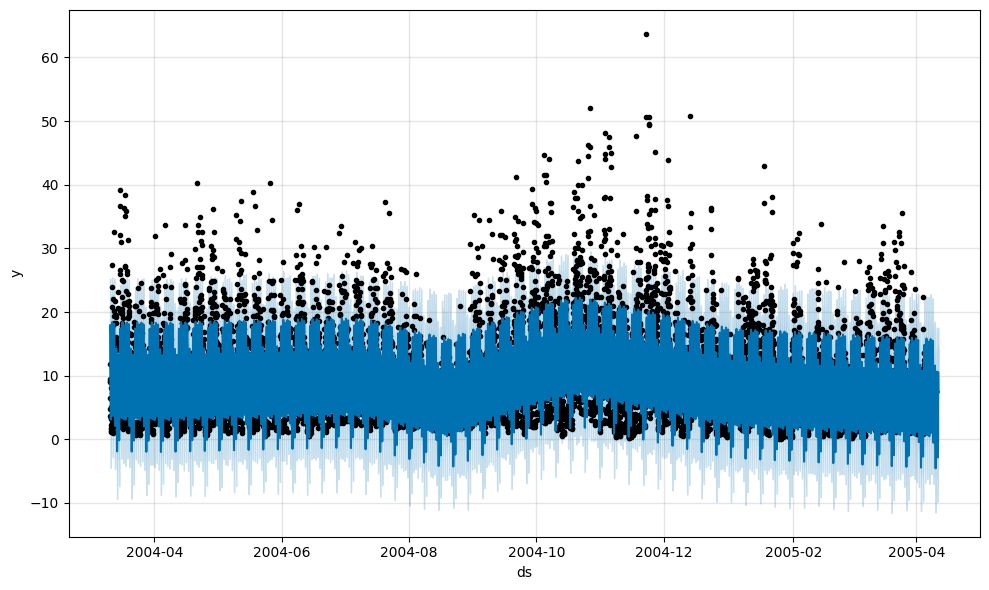

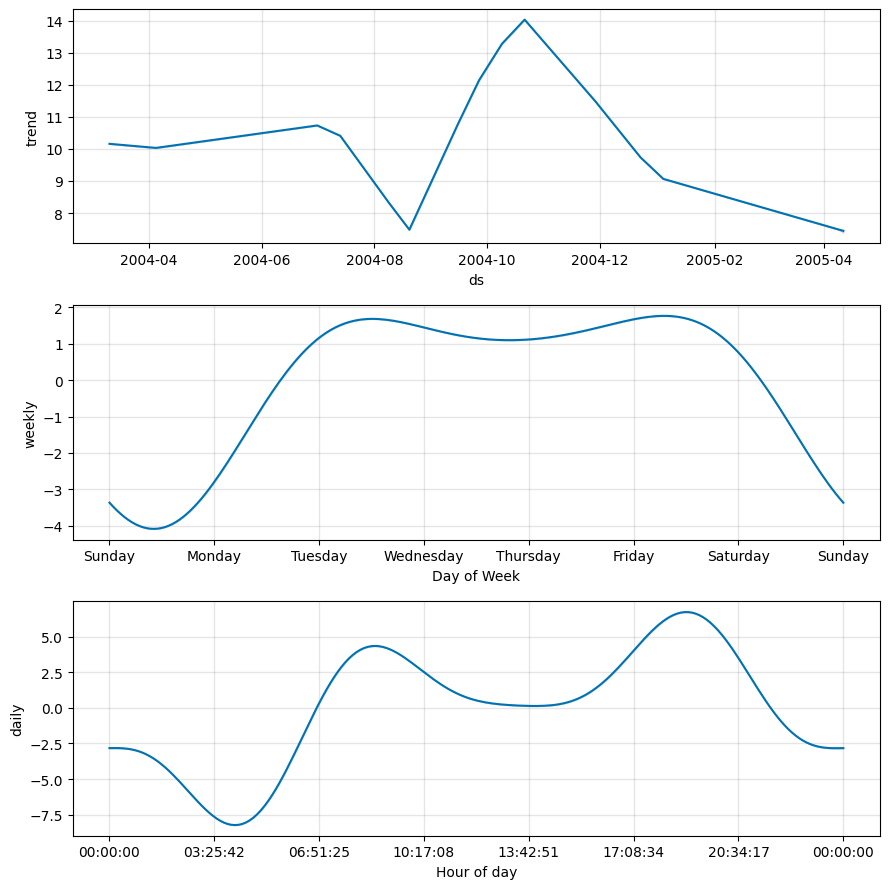

In [26]:
# Visualize the Forecast

# Plot the forecast
model.plot(forecast);

# Also, plot components (trend, weekly/yearly seasonality):
model.plot_components(forecast);


In [27]:
# View Forecasted Values

# View the forecasted y values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)  # Last 24 hours


,ds,yhat,yhat_lower,yhat_upper
9501,2005-04-10 15:00:00,3.946147,-3.390370,10.780615
9502,2005-04-10 16:00:00,5.159116,-2.204979,11.773387
9503,2005-04-10 17:00:00,7.384985,0.206306,14.794317
9504,2005-04-10 18:00:00,9.717766,2.667741,16.579917
9505,2005-04-10 19:00:00,10.636360,3.544014,17.554725
9506,2005-04-10 20:00:00,9.256120,2.053276,15.903894
9507,2005-04-10 21:00:00,6.226241,-0.981885,12.751467
9508,2005-04-10 22:00:00,3.303587,-3.277597,9.943806
9509,2005-04-10 23:00:00,1.883207,-5.441660,8.940364
9510,2005-04-11 00:00:00,1.830744,-5.121807,9.107767


In [ ]:
# MODEL EVALUATION & VISUALIZATION

In [28]:
# Merge Predictions with Actuals

# compare only the dates that exist in the original dataset (prophet_data) — not future dates.

# Merge original and predicted data
merged = pd.merge(prophet_data, forecast[['ds', 'yhat']], on='ds', how='inner')

# Check a sample
merged.head()



,ds,y,yhat
0,2004-03-10 18:00:00,11.9,17.160838
1,2004-03-10 19:00:00,9.4,17.962619
2,2004-03-10 20:00:00,9.0,16.456108
3,2004-03-10 21:00:00,9.2,13.291227
4,2004-03-10 22:00:00,6.5,10.225624


In [29]:
# Import Evaluation Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [30]:
# Calculate Metrics

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
r2 = r2_score(merged['y'], merged['yhat'])

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


MAE: 4.095
RMSE: 5.473
R² Score: 0.438


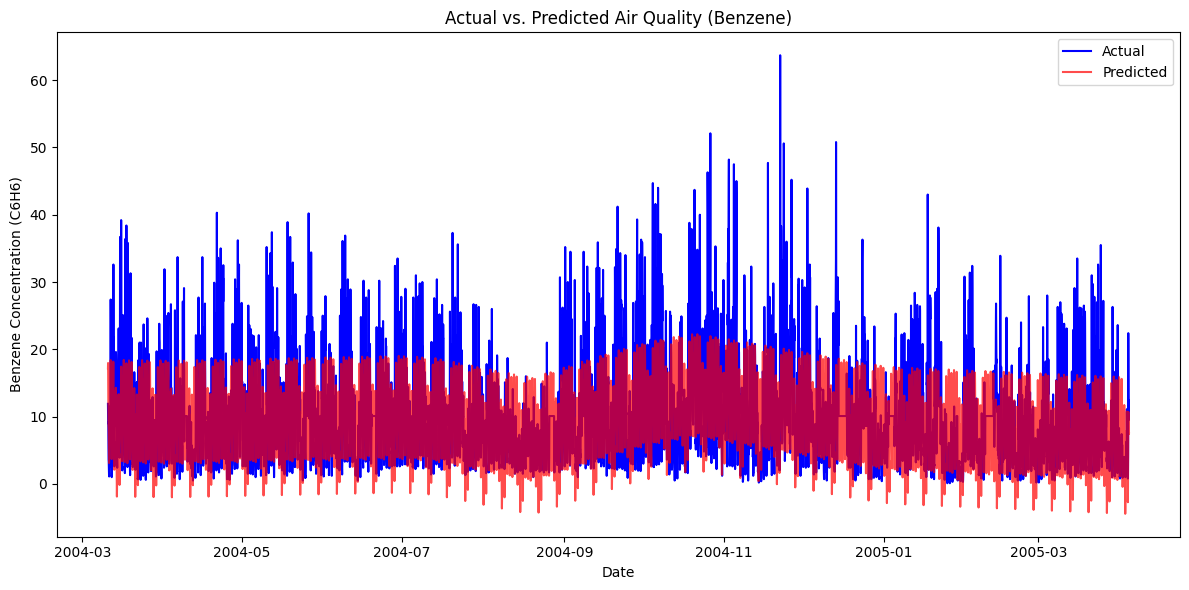

In [31]:
#  Plot Actual vs. Predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='blue')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Benzene Concentration (C6H6)')
plt.title('Actual vs. Predicted Air Quality (Benzene)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Extra challanges

In [32]:
# Extra Challenge 1: Predict Air Quality for a Specific Future Period (1 Week)

# Predicting Air Quality for the Next 7 Days


# already done
  # future = model.make_future_dataframe(periods=7 * 24, freq='H')

# But to highlight it more clearly, just extract and display predictions for the next 7 days:

# Filter only the future forecasted dates
future_forecast = forecast[forecast['ds'] > prophet_data['ds'].max()]

# Show predictions for the next 7 days
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(24)


,ds,yhat,yhat_lower,yhat_upper
9357,2005-04-04 15:00:00,7.934410,0.915105,14.167993
9358,2005-04-04 16:00:00,9.233542,2.461508,15.813952
9359,2005-04-04 17:00:00,11.525345,4.474252,18.264304
9360,2005-04-04 18:00:00,13.903874,7.152769,20.762881
9361,2005-04-04 19:00:00,14.848223,7.573779,22.314971
9362,2005-04-04 20:00:00,13.474072,6.647944,20.083831
9363,2005-04-04 21:00:00,10.431077,3.163142,17.166496
9364,2005-04-04 22:00:00,7.476696,0.558168,14.783119
9365,2005-04-04 23:00:00,6.006685,-0.994556,12.375443
9366,2005-04-05 00:00:00,5.887515,-1.127431,12.445327


In [33]:
# Extra Challenge 2: Create a Dashboard for Interactive Visualization

# Interactive Line Plot

import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Predicted Air Quality (C6H6)')
fig.show()


In [34]:
# compare actual vs. predicted:

fig2 = px.line(merged, x='ds', y=['y', 'yhat'], title='Actual vs. Predicted Benzene Levels')
fig2.show()


In [35]:
# Extra Challenge 3: LSTM Model for Air Quality Prediction

# Setup — Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [36]:
# Prepare the Data for LSTM

# We’ll use the datetime-indexed dataset (prophet_data) with columns: ds (datetime), y (C6H6 levels).

# Sort by date to ensure time series order
prophet_data = prophet_data.sort_values('ds')

# Set datetime index
df_lstm = prophet_data.set_index('ds')[['y']]

# Scale the values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)


In [37]:
# Create Sequences for LSTM

# need to convert the time series data into sequences.

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 24  # use past 24 hours to predict next value
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))



In [38]:
# Train/Test Split

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [39]:
# Build and Train LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0155 - val_loss: 0.0057
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0034 - val_loss: 0.0025


In [40]:
#  Evaluate the Model

# Predict
predictions = model.predict(X_test)

# Inverse scale
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
r2 = r2_score(actual_values, predicted_values)

print(f"LSTM MAE: {mae:.3f}")
print(f"LSTM RMSE: {rmse:.3f}")
print(f"LSTM R²: {r2:.3f}")


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
LSTM MAE: 2.070
LSTM RMSE: 3.167
LSTM R²: 0.755


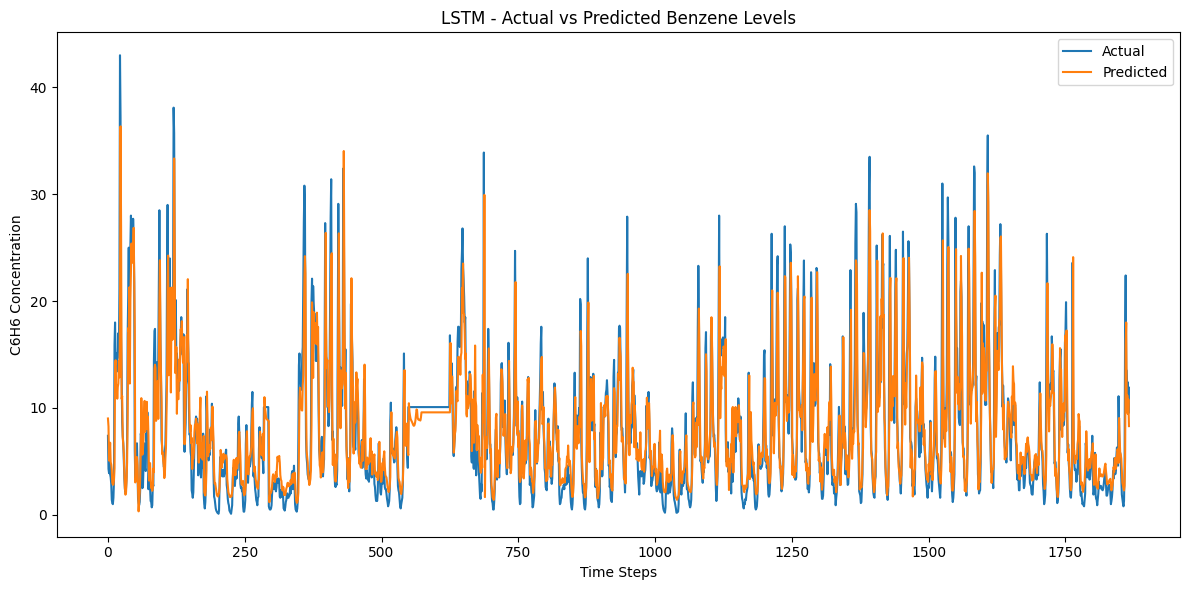

In [41]:
#  Plot Predictions

plt.figure(figsize=(12,6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('LSTM - Actual vs Predicted Benzene Levels')
plt.xlabel('Time Steps')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.tight_layout()
plt.show()
